In [16]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

with open("/data/cher/EcoBound/outputs/metrics/STL-train_no_overlap-loc-an_full-128-1024_cross_species_metrics_by_threshold.json", "r") as f:
    cross_species_metrics = json.load(f)

import pandas as pd

rows = []
for key, metrics in cross_species_metrics.items():
    pred_sp, true_sp = key.split("_on_")
    rows.append({
        "true_sp": true_sp,
        "pred_sp": pred_sp,
        "ap": metrics["ap"]
    })

df = pd.DataFrame(rows).sort_values(by=["true_sp", "pred_sp"])

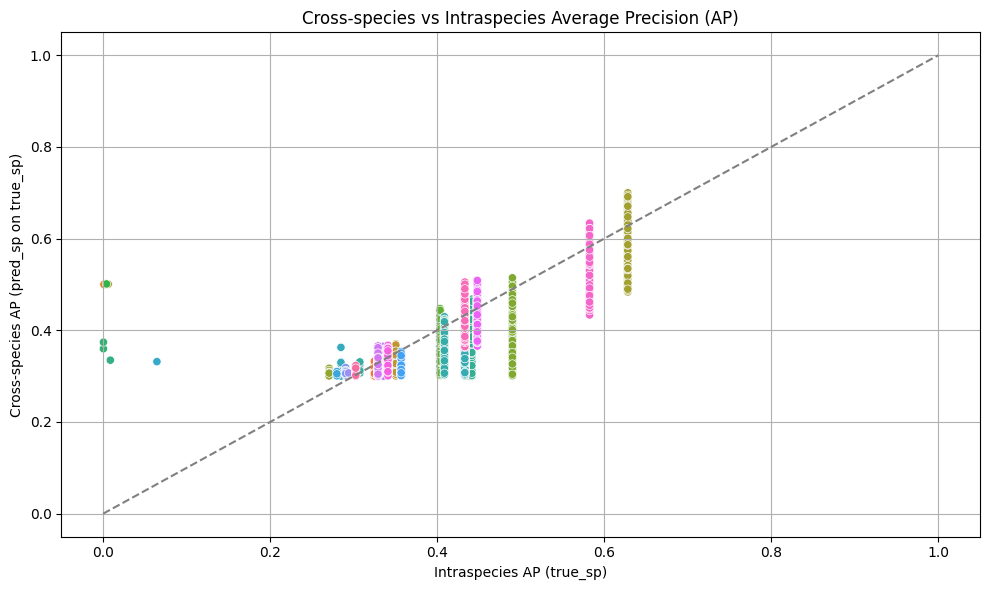

In [17]:

# Load intraspecies APs from the full dataset
with open("/data/cher/EcoBound/outputs/metrics/STL-train_no_overlap-loc-an_full-128-1024_metrics_by_threshold.json", "r") as f:
    full_metrics = json.load(f)

intraspecies_aps = full_metrics["full"]["aps"]  # This is a dict: species -> ap

# Add intraspecies AP for each row based on true species
df["intraspecies_ap"] = df["true_sp"].map(intraspecies_aps)

# --- Compute relative performance ---
df["relative_ap"] = df["ap"] / df["intraspecies_ap"]

# --- Filter out undefined (e.g., division by zero or missing intraspecies AP) ---
df = df[df["intraspecies_ap"].notnull() & (df["intraspecies_ap"] > 0)]

# --- Scatter plot of cross-species AP vs. intraspecies AP ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="intraspecies_ap", y="ap", hue="true_sp", legend=False)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Reference line: same performance
plt.xlabel("Intraspecies AP (true_sp)")
plt.ylabel("Cross-species AP (pred_sp on true_sp)")
plt.title("Cross-species vs Intraspecies Average Precision (AP)")
plt.grid(True)
plt.tight_layout()
plt.show()

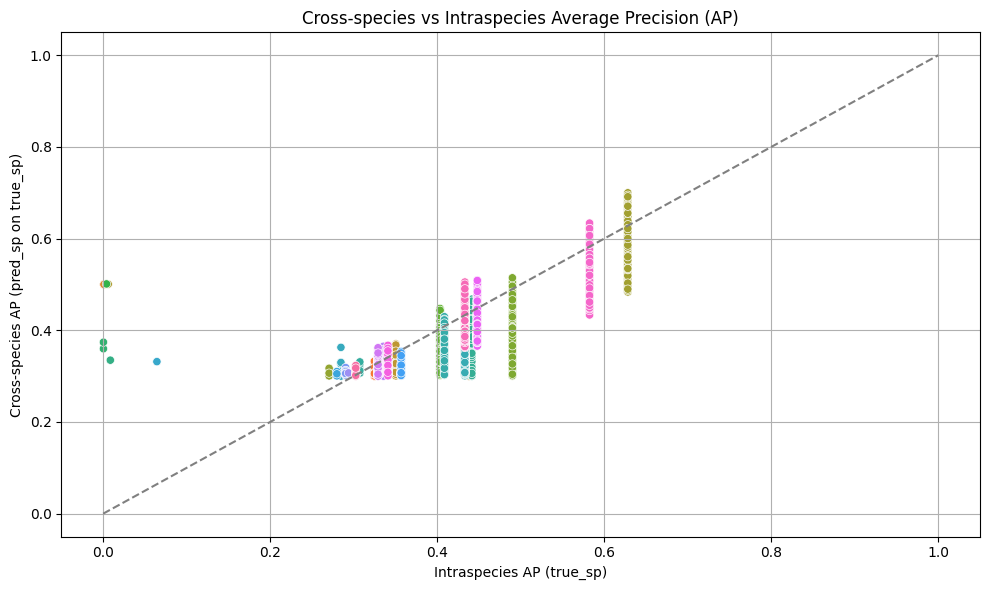

In [23]:
# What about species not in eBird?
not_ebird_df = df[~df["pred_sp"].isin(df['true_sp'].unique())]


# --- Scatter plot of cross-species AP vs. intraspecies AP ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=not_ebird_df, x="intraspecies_ap", y="ap", hue="true_sp", legend=False)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Reference line: same performance
plt.xlabel("Intraspecies AP (true_sp)")
plt.ylabel("Cross-species AP (pred_sp on true_sp)")
plt.title("Cross-species vs Intraspecies Average Precision (AP)")
plt.grid(True)
plt.tight_layout()
plt.show()